In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
url = r"C:\Users\ROSHAN\Downloads\bank+marketing\bank\bank-full.csv"
data = pd.read_csv(url, sep=';')

In [3]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day']
target_col = 'y'

In [4]:
X = data[feature_cols]
y = data[target_col].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary


In [5]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day']
numeric_features = ['age', 'balance']

In [6]:
# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

In [7]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

In [10]:
# Numerical feature names remain the same
num_feature_names = numeric_features


In [11]:
# Get categorical feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

In [12]:
# Combine numerical and categorical feature names
feature_names = num_feature_names + cat_feature_names.tolist()

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [14]:
# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [15]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [17]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8153267720889086
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      7952
           1       0.25      0.27      0.26      1091

    accuracy                           0.82      9043
   macro avg       0.58      0.58      0.58      9043
weighted avg       0.82      0.82      0.82      9043

Confusion Matrix:
 [[7073  879]
 [ 791  300]]


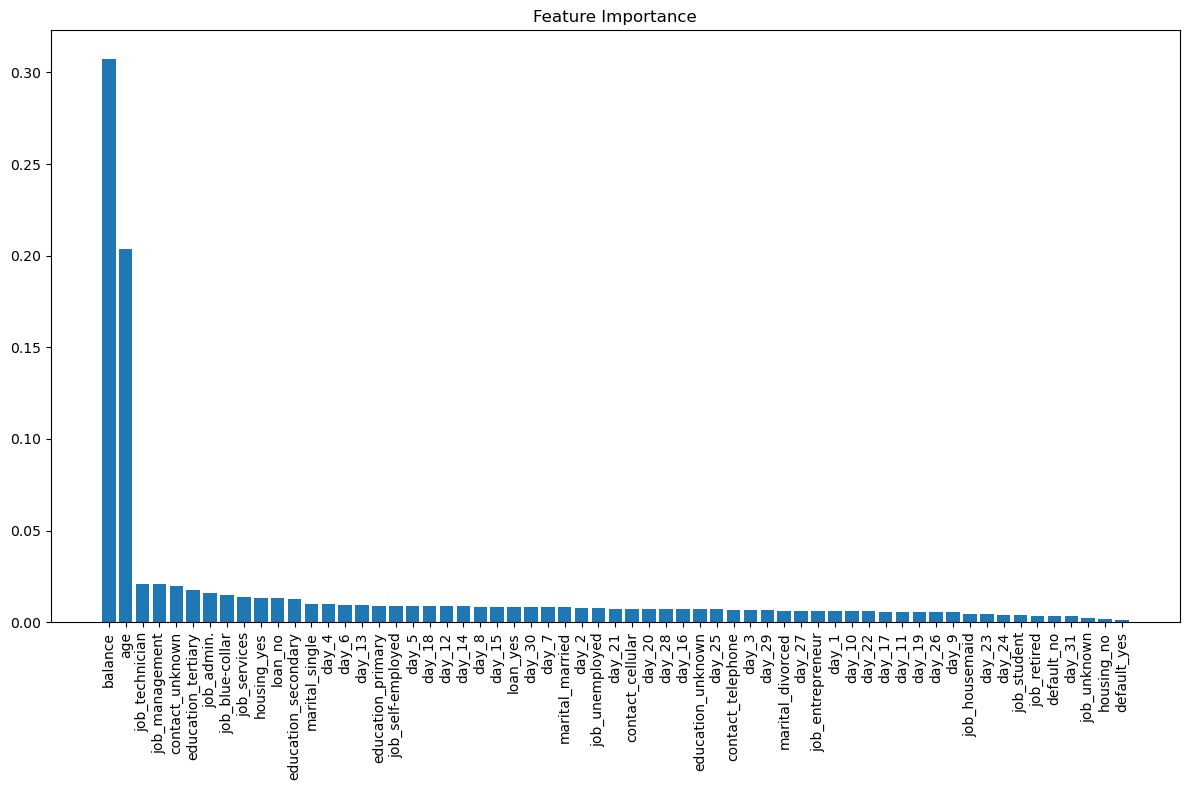

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance plot
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X_preprocessed.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_preprocessed.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


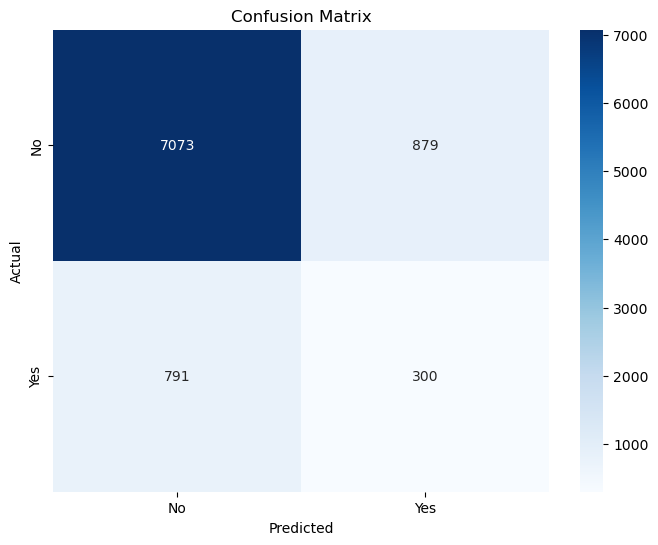

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


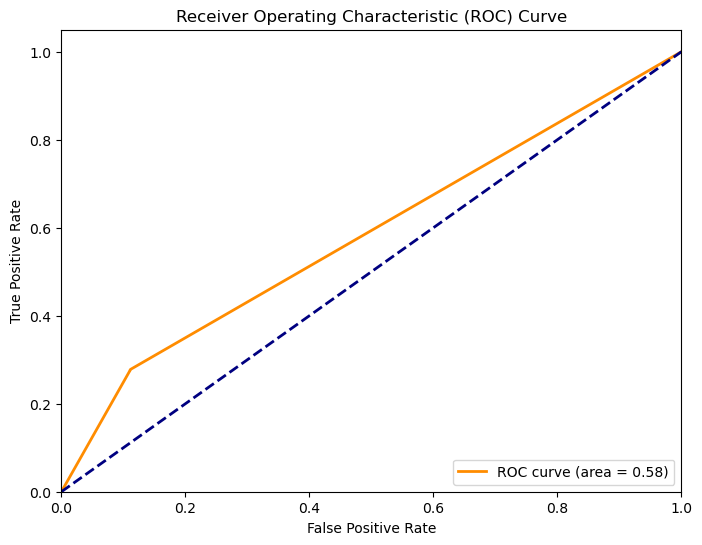

In [20]:
from sklearn.metrics import roc_curve, auc

# ROC curve and AUC score
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


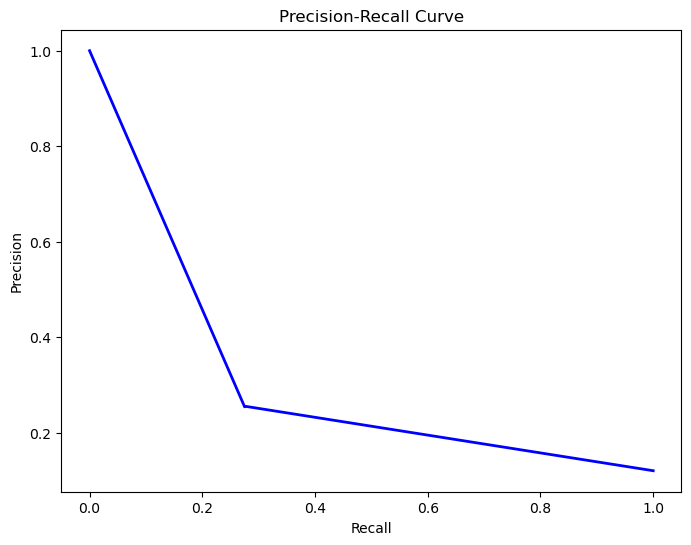

In [21]:
from sklearn.metrics import precision_recall_curve

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


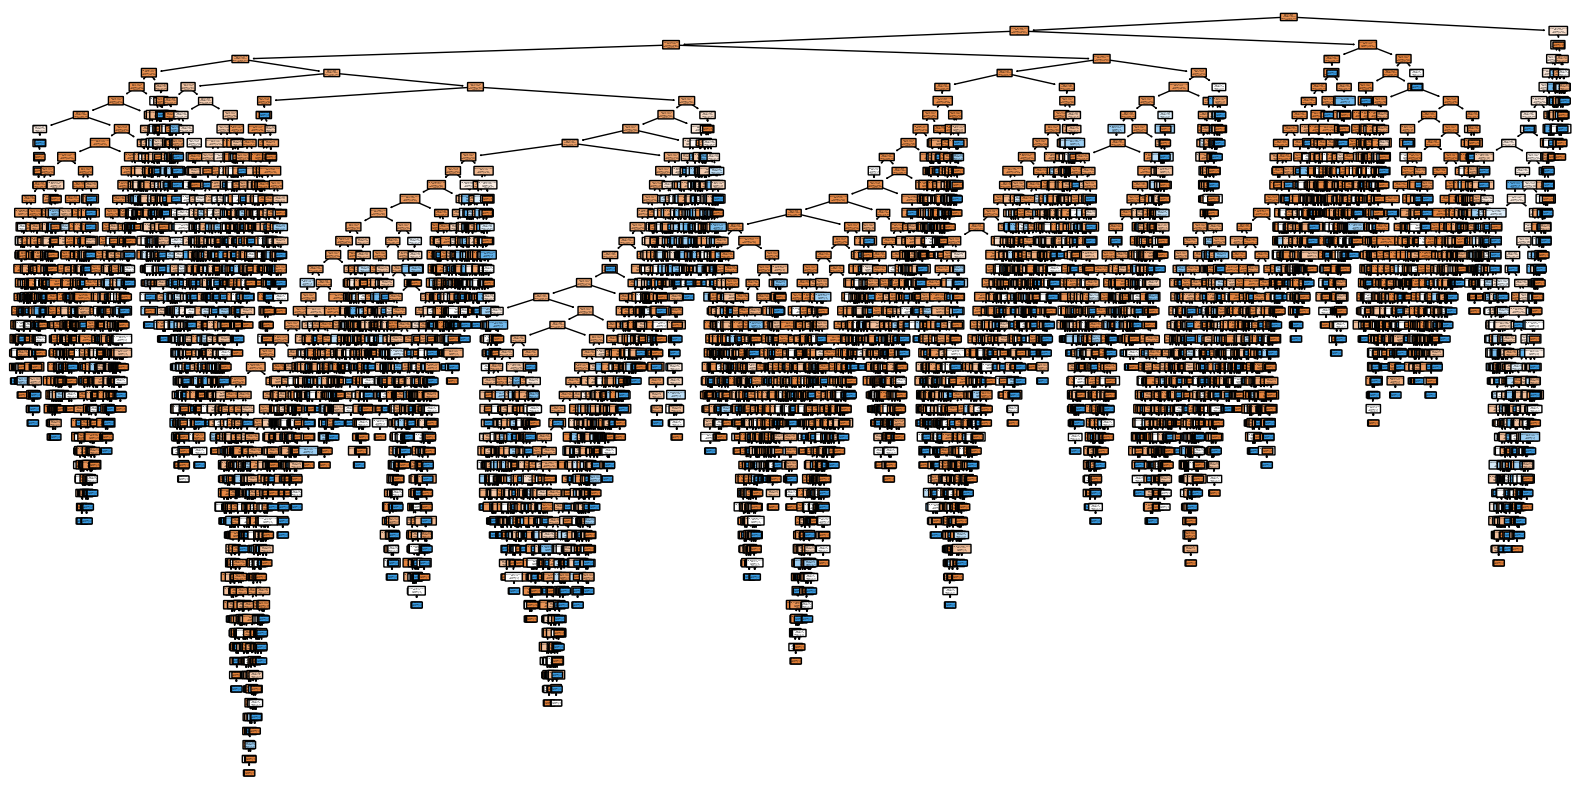

In [33]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['no', 'yes'], rounded=True)
plt.show()

In [35]:
def predict_subscription(customer_data):
    """
    Predict if a customer will subscribe based on their data.

    Parameters:
    - customer_data: dict with keys corresponding to feature columns.

    Returns:
    - 'yes' or 'no' indicating if the customer will subscribe.
    """
    customer_df = pd.DataFrame([customer_data])
    customer_preprocessed = preprocessor.transform(customer_df)
    prediction = clf.predict(customer_preprocessed)
    return 'yes' if prediction[0] == 1 else 'no'

# Example usage
customer_data = {
    'age': 30,
    'job': 'technician',
    'marital': 'single',
    'education': 'university.degree',
    'default': 'no',
    'balance': 1500,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 'mon'
}

result = predict_subscription(customer_data)
print("Will the customer subscribe?:", result)


Will the customer subscribe?: no


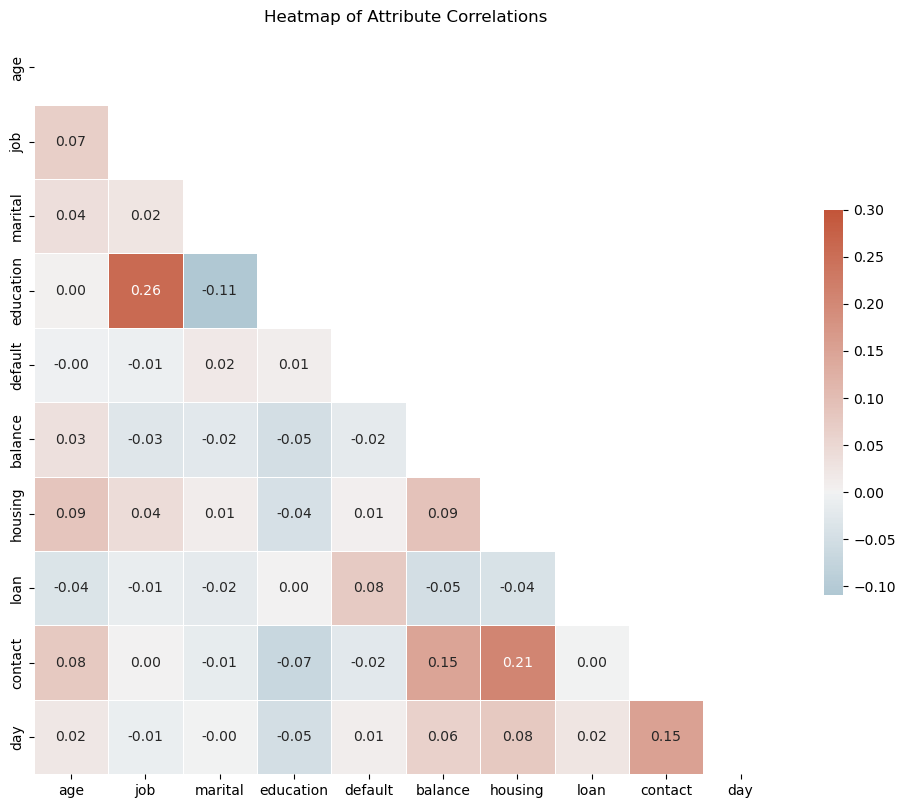

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data[feature_cols].apply(lambda x: pd.factorize(x)[0]).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5},
            annot=True, fmt=".2f")

plt.title('Heatmap of Attribute Correlations')
plt.show()
